In [98]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import warnings
warnings.filterwarnings('ignore')

NUM_OF_CLUSTERS = 4

In [99]:
vc = pd.read_csv('k-means.csv', sep=';', )
vc

,x,y
0,4,10
1,7,10
2,4,8
3,6,8
4,3,4
5,2,2
6,5,2
7,12,3
8,11,4
9,10,5


In [100]:
def init_centers(vc, NUM_OF_CLUSTERS):
    center = (vc.x.sum()/len(vc), vc.y.sum()/len(vc))
    vc['dist'] = pd.Series([])
    for i in range(len(vc)):
        vector = (vc['x'][i], vc['x'][i])
        vc['dist'][i] = distance.euclidean(center, vector)
    vc = vc.sort_values(by='dist', ascending=False)
    vc = vc.reset_index(drop=True)
    vc = vc[:NUM_OF_CLUSTERS]
    return vc[['x', 'y']].to_numpy().tolist()

In [101]:
def argmin(centers, vec):  
    dsts=[distance.euclidean(c, vec) for c in centers]
    return np.argmin(dsts)

In [102]:
def distribution(centers, vc):
    clusters = []
    for i in range(NUM_OF_CLUSTERS):
        clusters.append(pd.DataFrame(columns=['x', 'y']))
    for i in range(len(vc)):  
        index = argmin(centers, (vc['x'][i], vc['y'][i]))
        idx = len(clusters[index])
        clusters[index].loc[idx, 'x'] = vc.loc[i, 'x']
        clusters[index].loc[idx, 'y'] = vc.loc[i, 'y']
    return clusters

In [103]:
def new_centers(clusters, centers):
    newcenters = []
    j = 0
    for cluster in clusters:
        summ = np.zeros(2)
        size = len(cluster)
        for i in range(size):
            vec = cluster.loc[i]
            summ += np.array([vec[0], vec[1]])
        if size != 0:
            newcenters.append((summ / size).tolist())
        else:
            newcenters.append(centers[j])
        j += 1
        
    return newcenters

In [104]:
def k_means(vc, NUM_OF_CLUSTERS):
    
    centers = init_centers(vc, NUM_OF_CLUSTERS)
    flag = True
    clusters=[]
    
    while flag:
        clusters = distribution(centers, vc)
        newcenters = new_centers(clusters, centers)
        flag = centers != newcenters
        centers = newcenters
        
    return clusters

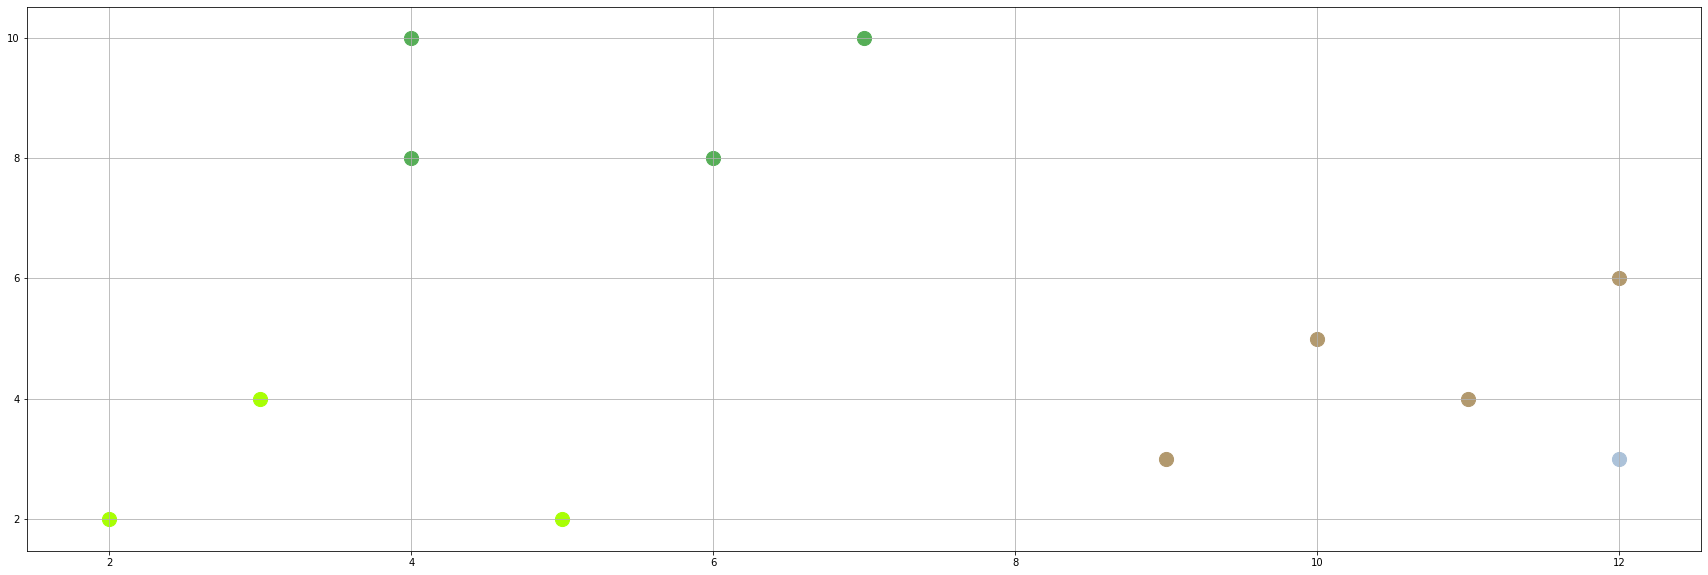

In [105]:
clusters = k_means(vc, NUM_OF_CLUSTERS)
plt.figure(figsize=(30, 10))
colors_list = list(colors._colors_full_map.values())
for j in range(len(clusters)):
    c = clusters[j]
    col = colors_list[j]
    for i in range(len(c)):
        plt.scatter(c['x'][i], c['y'][i], color=col, s=200, marker='o')
plt.grid(True)
plt.show()